## Hand written digits classification
Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

In [4]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = load_digits()
features = pd.DataFrame(data['data'])
labels  = pd.Series(data['target'])

In [14]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


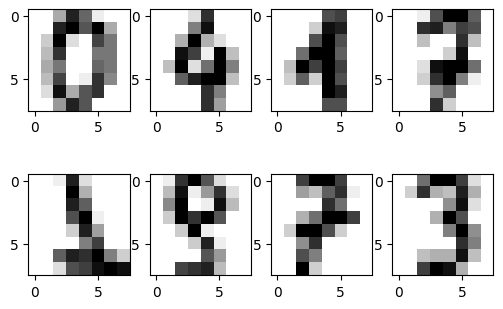

In [28]:
#data visualization
fig, axes = plt.subplots(2,4)
for index, row_group in enumerate([[0,100,200,300],[1000,1100,1200,1300]]):
    for i, row in enumerate(row_group):
        first_image = features.iloc[row]
        np_image  = first_image.values
        np_image = np_image.reshape(8,8)
        axes[index][i].imshow(np_image, cmap = 'gray_r')


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

total_accuracy = []
def cross_validation(k):
    kf = KFold(n_splits = 4, random_state = 53, shuffle = True)
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.loc[train_index], labels.loc[train_index]
        test_features, test_labels = features.loc[test_index], labels.loc[test_index]
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(train_features, train_labels)
        predictions = model.predict(test_features)
        test_df = pd.DataFrame()
        test_df['acutal'] = test_labels
        test_df['predict'] = predictions
        accuracy = sum(test_df['acutal'] == test_df['predict'])/test_df.shape[0]
        total_accuracy.append(accuracy)
    return np.mean(total_accuracy)

In [52]:
cross_validation(1)

0.9849789656025736

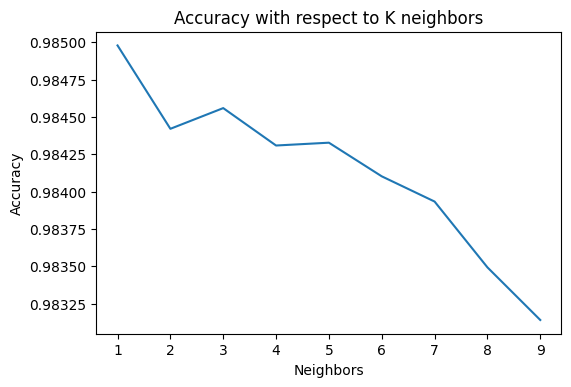

In [53]:
k = list(range(1, 10))
k_accuracy = []
for val in k:
    k_accuracy.append(cross_validation(val))
    
plt.plot(k, k_accuracy)
plt.title("Accuracy with respect to K neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()

There are a few downsides to using k-nearest neighbors:

high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
no model representation to debug and explore

In [54]:
from sklearn.neural_network import MLPClassifier

In [59]:
total_accuracy = []


def cross_validation(neuron_size):
    kf = KFold(n_splits = 4, random_state = 53, shuffle = True)
    for train_index, test_index in kf.split(features):
        train_features, train_labels = features.loc[train_index], labels.loc[train_index]
        test_features, test_labels = features.loc[test_index], labels.loc[test_index]
        model = MLPClassifier(hidden_layer_sizes = neuron_size)
        model.fit(train_features, train_labels)
        predictions = model.predict(test_features)
        test_df = pd.DataFrame()
        test_df['acutal'] = test_labels
        test_df['predict'] = predictions
        accuracy = sum(test_df['acutal'] == test_df['predict'])/test_df.shape[0]
        total_accuracy.append(accuracy)
    return np.mean(total_accuracy)

In [60]:
cross_validation((8,))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.8881464983914873

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

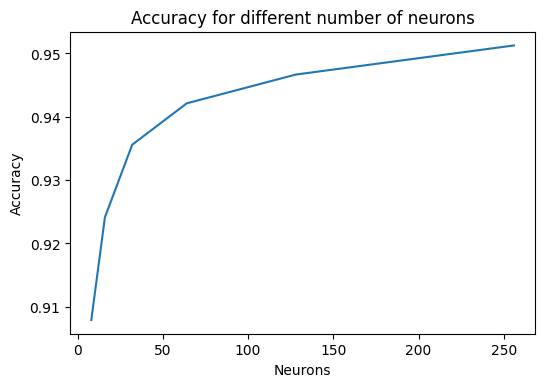

In [62]:
neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]
neuron_accuracy = []

for neuron in neurons:
    neuron_accuracy.append(cross_validation(neuron))
                           
plt.plot(neurons, neuron_accuracy)
plt.title("Accuracy for different number of neurons")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.show()

As we increased the number of neurons, the accuracy also got better. But its accuracy is not as best as that of the K Nearest Neighbor Algorithm. So we will increase the number of hidden layes

In [ ]:
neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
neuron_accuracy = []
for neuron in neurons:
    neuron_accuracy.append(cross_validation(neuron))
x = [i[0] for i in neurons]             
plt.plot(x, neuron_accuracy)
plt.title("Accuracy for different number of neurons\nTwo layer neural network")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.show()

Further experimentaions could be done for 3 layers with different cross validation parameters. But the general idea is as we increase the number of layers and neurons, we can get a sense of increase in the accuracy but we should be careful that a model could overfit as well